## Exploring spectrograms
https://www.kaggle.com/davids1992/speech-representation-and-data-exploration

In [1]:
# File utilities
import glob 
import os.path

import numpy as np

# To read spectrograms
from scipy import signal
from scipy.io import wavfile

# To resize spectrograms
import cv2 

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
yes_paths = glob.glob("../datasets/speech_yesno/yes/*wav")
no_paths = glob.glob("../datasets/speech_yesno/no/*wav")
print(f"Found {len(yes_paths)} 'yes' files and {len(no_paths)} 'no' files")

Found 2375 'yes' files and 2375 'no' files


Text(0.5, 0, 'Seconds')

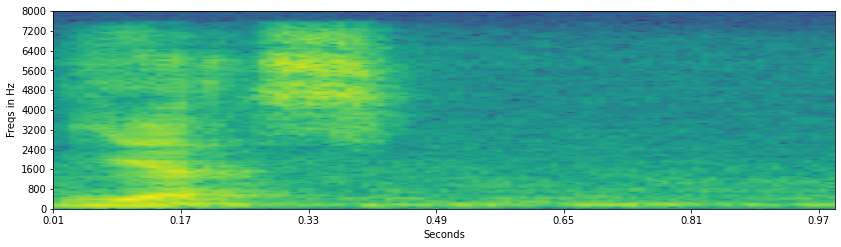

In [7]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.astype(np.float32) + eps)

# Read WAV file
file_path = yes_paths[0]
sample_rate, samples = wavfile.read(file_path)

# Produce log spectrogram
freqs, times, spectrogram = log_specgram(samples, sample_rate)

# Resize to 16x16
# spectrogram = cv2.resize(spectrogram, (8,8), cv2.INTER_CUBIC)

fig = plt.figure(figsize=(14, 8))
ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
# ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')
# Plot
# plt.imshow(spectrogram, aspect='auto', origin='lower', 
#            extent=[times.min(), times.max(), freqs.min(), freqs.max()])

# plt.title("Log spectrogram of \"yes\"")
# plt.xlabel("Time (s)")
# plt.ylabel("Frequency (Hz)")

# plt.show()

# fig = plt.figure(figsize=(14, 8))
# ax1 = fig.add_subplot(211)
# # ax1.set_title('Raw wave of ' + filename)
# ax1.set_ylabel('Amplitude')
# ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [ ]:
plt.imshow(cv2.resize(spectrogram), (8,8), cv2.INTER_CUBIC)

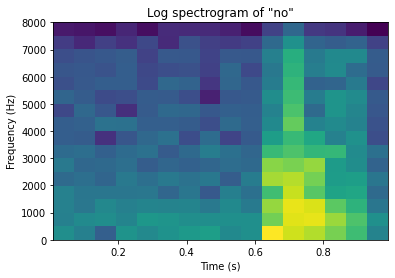

In [5]:
# Read WAV file
file_path = no_paths[0]
sample_rate, samples = wavfile.read(file_path)

# Produce log spectrogram
freqs, times, spectrogram = log_specgram(samples, sample_rate)

# Resize to 16x16
spectrogram = cv2.resize(spectrogram, (16,16), cv2.INTER_CUBIC)

# Plot
plt.imshow(spectrogram, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])

plt.title("Log spectrogram of \"no\"")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.show()

In [10]:
import skimage.measure

file_path = no_paths[3]

for file_path in yes_paths[:50]:
    sample_rate, samples = wavfile.read(file_path)

    # Produce log spectrogram
    freqs, times, spectrogram = log_specgram(samples, sample_rate)

    spectrogram = skimage.measure.block_reduce(spectrogram, (8, 8), np.max)
    print(spectrogram.shape)

# Plot
# plt.imshow(spectrogram, aspect='auto', origin='lower', 
#            extent=[times.min(), times.max(), freqs.min(), freqs.max()])

# plt.title("Log spectrogram of \"no\"")
# plt.xlabel("Time (s)")
# plt.ylabel("Frequency (Hz)")

# plt.show()

(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 9)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 11)
(21, 13)
(21, 13)
(21, 13)
(21, 13)
(21, 10)
(21, 13)
(21, 13)
(21, 13)
